In [1]:
import pandas as pd

In [112]:
df = pd.read_pickle("../../data/Visual_well_being/merged_features.pickle")

In [113]:
df.to_csv("out.csv",sep=";")

In [114]:
df.shape

(158, 340)

In [115]:
list(df.columns)

['age',
 'user_followed_by',
 'user_follows',
 'user_posted_photos',
 'ratio_Abyssinian',
 'ratio_Alcohol',
 'ratio_Animal',
 'ratio_Appliance',
 'ratio_Architecture',
 'ratio_Art',
 'ratio_Asleep',
 'ratio_Automobile',
 'ratio_Baby',
 'ratio_Beach',
 'ratio_Beard',
 'ratio_Bedroom',
 'ratio_Bench',
 'ratio_Beverage',
 'ratio_Bicycle',
 'ratio_Bike',
 'ratio_Bikini',
 'ratio_Bird',
 'ratio_Blanket',
 'ratio_Blonde',
 'ratio_Blossom',
 'ratio_Boat',
 'ratio_Book',
 'ratio_Bottle',
 'ratio_Bowl',
 'ratio_Bread',
 'ratio_Brochure',
 'ratio_Building',
 'ratio_Cake',
 'ratio_Canine',
 'ratio_Car',
 'ratio_Carrot',
 'ratio_Cat',
 'ratio_Chair',
 'ratio_Child',
 'ratio_Chocolate',
 'ratio_Clothing',
 'ratio_Club',
 'ratio_Coast',
 'ratio_Collage',
 'ratio_Cookie',
 'ratio_Couch',
 'ratio_Cream',
 'ratio_Creme',
 'ratio_Crowd',
 'ratio_Cup',
 'ratio_Dawn',
 'ratio_Dessert',
 'ratio_Dog',
 'ratio_Drawing',
 'ratio_Drink',
 'ratio_Drum',
 'ratio_Dusk',
 'ratio_Electronics',
 'ratio_Face',
 'rati

In [119]:
df.education.unique()

array([1, 0, 2, 3])

In [126]:
pd.get_dummies(df.gender,prefix="gender")
pd.get_dummies(df.employed,prefix="employed")

,employed_0,employed_1,employed_2,employed_3,employed_4,employed_5,employed_6,employed_7
0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0
5,0,0,1,0,0,0,0,0
6,1,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0
8,1,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0


In [6]:
response_columns = ['P', 'E', 'R', 'M', 'A', 'PERMA']
category_columns = ['gender', 'education', 'employed', 'income', 'participate',"born"]
Y = df[response_columns]
X = df.drop(response_columns + category_columns, axis=1)

In [7]:
from scipy.stats import boxcox

for col_name in X.columns[1:]:
    X[[col_name]] = boxcox(X[[col_name]]+1)[0]

In [8]:
X = X.fillna(0)

In [9]:
#other imports
from math import floor

# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


# TODO: Initialize the three models
clf_A = LinearRegression()
clf_B = SVR()
clf_C = GradientBoostingRegressor()

models = [clf_A, clf_B, clf_C]

In [10]:
#from sklearn.feature_selection import SelectKBest, SelectFpr, mutual_info_regression
#from sklearn.feature_selection import f_regression
#x = SelectFpr(f_regression).fit_transform(X, y)

In [11]:
x.shape

NameError: name 'x' is not defined

In [90]:
from sklearn.feature_selection import RFECV, RFE
rfecv = RFECV(clf_C, cv=3,
              min_features_to_select=1,
              max_features_to_select=20,
              n_jobs=4,
              scoring='r2')#'r2')

In [108]:
rfecv.ranking_

array([  1,   1,   1,   1,  37,  36,  35,   7,  54,   1,  44,  43,  32,
        42,  49,   1,  57,   3,  62,  66,  59,  67,  78,  73,  69,  63,
        64,   1,   1,  85,   1, 103,  88,  24,  12, 112,  29,  72,  22,
       109,  93,  45,  98,   1,  10, 108,  84,   1, 115,  82,  65, 110,
       145,   1,  79, 118,  86,  31, 151,  47,  89,  33, 102,   1,   1,
         1,  18,  58,   1,  71,  38, 131, 113,   1, 105, 137,   1, 117,
         1, 123,   1, 149, 130, 132,   1, 172, 179, 171, 140, 129, 178,
       142, 184, 146, 183, 148,   1,  21, 211, 243,   6, 119,   1, 225,
        26, 165, 194,   1, 153, 189, 200, 155, 157, 252, 158, 267,   1,
         1,  15, 227, 255,   4, 133, 247, 198, 222, 262, 193, 245, 250,
       242, 199, 207, 229,   1, 161,   1, 240,  14,  17, 260, 256, 258,
         2, 264, 180,   1,  13,   9,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1, 237,   1,   1, 268, 270,   1, 128,  27,   1,   1,
         1,   1, 120,   1,   1,   1,   1,  19,  60, 144,   8,  5

In [100]:
from sklearn.model_selection import train_test_split
y = Y['PERMA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99999)

In [101]:
rfecv.fit(X_train,y_train)

RFECV(cv=3,
   estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=4, scoring='r2', step=1, verbose=0)

In [109]:
list(X.columns[rfecv.support_])

['age',
 'user_followed_by',
 'user_follows',
 'user_posted_photos',
 'ratio_Art',
 'ratio_Bedroom',
 'ratio_Bottle',
 'ratio_Bowl',
 'ratio_Brochure',
 'ratio_Collage',
 'ratio_Creme',
 'ratio_Drawing',
 'ratio_Flyer',
 'ratio_Food',
 'ratio_Fruit',
 'ratio_Glass',
 'ratio_Hair',
 'ratio_Home Decor',
 'ratio_Human',
 'ratio_Kid',
 'ratio_Logo',
 'ratio_Paper',
 'ratio_Plant',
 'ratio_Quilt',
 'ratio_Selfie',
 'ratio_Shirt',
 'ratio_Television',
 'ratio_Text',
 'avg_number_of_faces_over_images_with_faces',
 'avg_comments',
 'happy_flt_pct',
 'depressed_flt_pct',
 'happy_to_depressed_flt_ratio',
 'avg_posts_early_day',
 'avg_posts_late_day',
 'avg_posts_early_night',
 'avg_posts_late_night',
 'avg_posts_day',
 'avg_posts_night',
 'ANGRY',
 'CALM',
 'HAPPY',
 'ratio_male',
 'ratio_female',
 'cluster_0',
 'cluster_1',
 'total_number_of_likes',
 'total_number_of_comments',
 'num_images_with_comments',
 'num_images_no_comments',
 'count_SAD',
 'count_Art',
 'count_Cookie',
 'count_Guitarist

In [103]:
y_train_pred = rfecv.predict(X_train)
y_test_pred = rfecv.predict(X_test)

In [110]:
r2_score(y_train,y_train_pred)

0.9257945048238897

In [111]:
r2_score(y_test,y_test_pred)

-0.11427657723115159

In [106]:
from sklearn.metrics import r2_score, mean_squared_error

In [107]:
#mean_squared_error(y_test,y_pred)

In [81]:
r2_score(y_train,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [142, 126]

In [46]:
y = Y['PERMA']
X_train, X_test, y_train, y_test = train_test_split(X[list(X.columns[rfecv.support_])], y, test_size=0.20, random_state=10)

In [47]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [55]:
lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True, scoring="r2" )
clf.fit(X_train, y_train)

/home/jeroen/miniconda3/envs/FDS-PROJECT1/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/jeroen/miniconda3/envs/FDS-PROJECT1/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/jeroen/miniconda3/envs/FDS-PROJECT1/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/jeroen/miniconda3/envs/FDS-PROJECT1/lib/python3.7/site-packages/sklearn/line

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': array([1.00000e-04, 1.32035e-04, 1.74333e-04, 2.30181e-04, 3.03920e-04,
       4.01281e-04, 5.29832e-04, 6.99564e-04, 9.23671e-04, 1.21957e-03,
       1.61026e-03, 2.12611e-03, 2.80722e-03, 3.70651e-03, 4.89390e-03,
       6.46167e-03, 8.53168e-03, 1.12648e-02, 1.48735e-02, 1.96383e-02,
       2.59294e-02, 3.42360e-02, 4.52035e-02, 5.96846e-02, 7.88046e-02,
       1.04050e-01, 1.37382e-01, 1.81393e-01, 2.39503e-01, 3.16228e-01])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [56]:
# = clf.bst_estimator_
y_pred = clf.predict(X_test)
r2_score(y_test,y_pred)

-0.06628313789270024

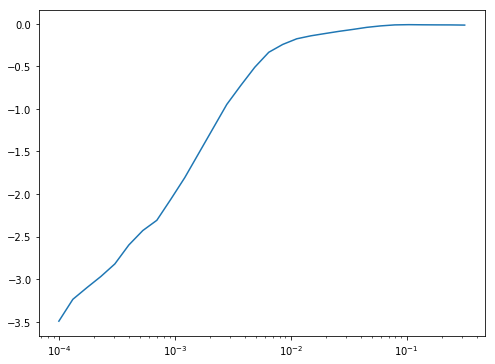

In [34]:
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

In [ ]:
# Collect results on the learners
results = {}
for clf in models:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        (clf, samples, X_train, y_train, X_test, y_test)

In [8]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    sample_X_train = X_train[:sample_size]
    sample_y_train = y_train[:sample_size]
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' 
    ## using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(sample_X_train, sample_y_train)
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_true=y_train[:300],
                                          y_pred=predictions_train,
                                          normalize=True)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_true=y_test,
                                        y_pred=predictions_test,
                                        normalize=True)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_true=y_train[:300],
                                    y_pred=predictions_train,
                                    beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_true=y_test,
                                    y_pred=predictions_test,
                                    beta=0.5)
       
    # Success
    print ("{} trained on {} samples.").format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

In [ ]:
# gbm
# linear modle
# SVM linear Modle

In [ ]:
for i in models():
    # feature selection
    